# # Introduction

An realistic lower-end estimate of the benefit-cost ratio (BCR) from disaster risk reduction for hydroclimatic extremes is 4:1, meaning that (on average) every $1 spent on disaster risk reduction reduces the economic impacts of the hazard by $4. To illustrate, this BCR should be expected to turn a $1000 investment into a $4000 saving from the impacts of an extreme event. 

- resampling
- expected value
- fat tails

### Scenario

You have been asked to make recommendations to FEMA regarding the annual budget that should be allocated to disaster risk reduction from hurricanes. We'll call this amount of funding (in $Bn per year), ${k}$.

You are told that the mean impact of  hurricanes has been $18.9 Billion/year. The standard deviation has been $41 Billion.  

You are also told that a *trillion* dollar disaster bill in any individual year would be *ruinous* (i.e., the US would at risk of becoming a failed state if it suffered such high losses). The 100-year risk of a trillion dollar disaster must therefore be no more than 20 % (which is approximately the same as the *estimated* probability that the human race goes extinct within that time period). 

How much, then, should FEMA allocate for disaster risk reduction (i.e., what is the optimum value for ${k}$)?

Take a moment to think about how you would approach such a problem. 

If you're scratching your head, I'm not surprised. The above is quite a tricky problem to solve. So let's break it down. 

First, we'll deal with trying to *minimze the expected cost*.  If you haven't figured it out already, the optimum *investment ($k$)* is that which is exactly one quarter of the *expected cost*. Why? Because exactly this amount "neutralises" the threat if the BCR is 4:1; any more investment is money wasted, whereas any less and we must suffer residual impacts. In other words: 

Total cost = | impact - 4$k$ |

where the vertical lines denote the "absolute magnitude" (i.e., irrespective of the sign). Stating things in this way makes clear that if 4k exceeds the impact, the money is "wasted"; the minimum cost is achieved only when 4$k$ is equal to the impact. 


... expected cost is equal to the mean.


... Extrapolation into the tail (for risk of catastrophe). 

... Normal, CDF --> how do we go from one year risk to many-year risk? B-distribution. 



In [326]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from random import randint
from scipy import stats
data=pd.read_csv("Data/HurricaneDamage.csv",index_col="lf_ISO_TIME",parse_dates=True)
ny=np.max(data.index.year)-np.min(data.index.year)+1
data["ND"]/=1e9
anncost=data["ND"].resample("Y").sum()
annidx=pd.date_range(start="%.0f/01/01"%anncost.index.year[0],end="%.0f/01/01"%anncost.index.year[-1],freq="1y")
anncost=anncost.reindex(annidx)
print("Mean annual cost is $%.1f"%anncost.mean())
print("Mean annual standard deviation is $%.1f"%anncost.std())
#anncost=anncost.loc[anncost>0]
#data=data.loc[data["ND"]>16.]
cost=data["ND"].values[:]
ne=len(cost)
pyr=ne/ny

Mean annual cost is $18.9
Mean annual standard deviation is $41.0


(0.001584893192461114, 1)

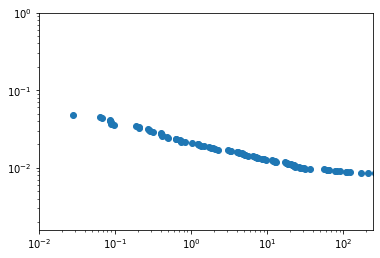

In [272]:
na=len(anncost)
order=np.argsort(anncost.values[:])
z=anncost[order].values
cf=1/np.arange(1,na+1)
fig,ax=plt.subplots(1,1)
ax.scatter(z,cf)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(0.01,250)
ax.set_ylim(10**-2.8,1)

In [331]:
# Resampling
ks=np.linspace(0,15,50)
ok=np.zeros(len(ks))*np.nan
count=0
for k in ks:
    nsim=10000
    impact=np.zeros(nsim)*np.nan
    total_cost=np.zeros(nsim)*np.nan
    for i in range(nsim):
        hazard=anncost[randint(0,na-1)]
        impact[i]=hazard-np.min([4*k,hazard])
        total_cost[i]=impact[i]+k
    ok[count]=np.mean(total_cost)
    count+=1

4.7342008547008545

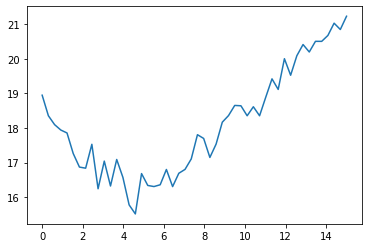

In [333]:
plt.plot(ks,ok)
np.mean(anncost/4.)

In [261]:
shape,loc,scale=stats.genpareto.fit(anncost)
refcost=np.linspace(np.min(anncost),1e3,1000)
p=stats.genpareto.pdf(refcost,shape,loc=loc,scale=scale)

Text(0.5, 0, 'Damage (2018 $Bn)')

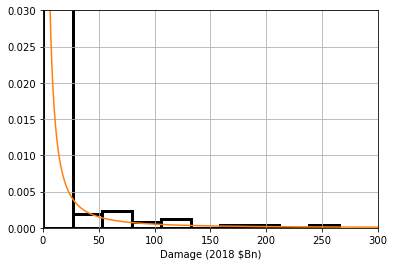

In [265]:
fig,ax=plt.subplots(1,1)
ax.hist(anncost,bins=10,density=True,facecolor='w',edgecolor='k',linewidth=3)
ax.plot(refcost,p)
ax.set_ylim(0,0.03)
ax.set_xlim(0,300)
ax.grid()
ax.set_xlabel("Damage (2018 $Bn)")

9.557048275816609 16.771102533982205 7.214054258165603


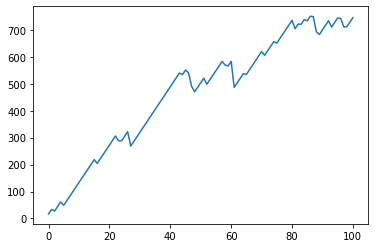

In [167]:
nsim=100
crit=-200 # Bn
balance=np.zeros(nsim+1)*np.nan
tracked_impact=np.zeros(len(balance))
tracked_alloc=np.zeros(len(balance))
tracked_net=np.zeros(len(balance))
impact=0
E=np.mean(cost)
ny=np.max(years)-np.min(years)+1
alloc=E*ne/ny
balance[0]=alloc
for i in range(1,nsim+1):
    if np.random.uniform(low=0,high=1)<=pyr:
        impact=stats.genpareto.rvs(shape,loc=loc,scale=scale,size=1)
    else: impact =0
    tracked_impact[i]=impact
    tracked_alloc[i]=alloc
    tracked_net[i]=alloc-impact
    balance[i]=balance[i-1]+alloc-impact
print(np.mean(tracked_impact),np.mean(tracked_alloc),np.mean(tracked_net))
plt.plot(balance)

58.44122008223786


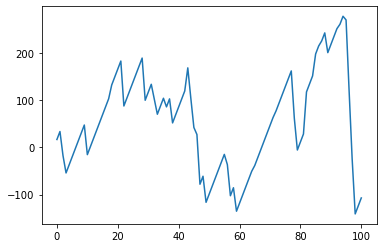

In [198]:
nsim=100
balance=np.zeros(nsim+1)*np.nan
tracked=np.zeros(len(balance))
impact=0
alloc=E*ne/ny
balance[0]=alloc
for i in range(1,nsim+1):
    if np.random.uniform(low=0,high=1)<=pyr:
        impact=stats.norm.rvs(loc=E,scale=np.std(cost),size=1)
    else: impact =0
    tracked[i]=impact
    balance[i]=balance[i-1]+alloc-impact
print(np.mean(balance))
plt.plot(balance)

In [191]:
np.std(cost)


49.29040383025888

Can you explain what is going on?

What lessons can be learned regarding climate risk?

Covid is another fat-tailed risk. 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7533687/